In [235]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report


## Input Variable

In [236]:
#read csv file
path1 = "../Data/final_data.csv"
final_df = pd.read_csv(path1)
# Drop column and set index
final_df.set_index("Unnamed: 0", inplace=True)

final_df.drop(columns=['art_score'], inplace=True)
final_df

Anzahl der Einwohner: innen  \
Unnamed: 0                                                       
Hamburg-Altstadt                                        3182.0   
HafenCity                                               6950.0   
Neustadt                                               12649.0   
St. Pauli                                              22056.0   
St. Georg                                              12318.0   
Hammerbrook                                             5990.0   
Borgfelde                                               8569.0   
Hamm                                                   38720.0   
Horn                                                   38425.0   
Billstedt                                              71789.0   
Billbrook                                               1791.0   
Rothenburgsort                                          9641.0   
Veddel                                                  4288.0   
Wilhelmsburg                                           52961.0   
Kleiner Grasbrook und Steinwerder                       1105.0   
Waltershof und Finkenwerder                            11690.0   
Altona-Altstadt                                        29661.0   
Sternschanze                                            7889.0   
Altona-Nord                                            26592.0   
Ottensen                                               35365.0   
Bahrenfeld                                             31311.0   
Groß Flottbek                                          11152.0   
Othmarschen                                            16590.0   
Lurup                                                  37154.0   
Osdorf                                                 26148.0   
Nienstedten                                             7055.0   
Blankenese                                             13733.0   
Iserbrook                                              11569.0   
Sülldorf                                                9418.0   
Rissen                                                 16397.0   
Eimsbüttel                                             57875.0   
Rotherbaum                                             17153.0   
Harvestehude                                           17994.0   
Hoheluft-West                                          13597.0   
Lokstedt                                               31317.0   
Niendorf                                               42184.0   
Schnelsen                                              30690.0   
Eidelstedt                                             36098.0   
Stellingen                                             27993.0   
Hoheluft-Ost                                            9782.0   
Eppendorf                                              24639.0   
Groß Borstel                                           10812.0   
Alsterdorf                                             15136.0   
Winterhude                                             58052.0   
Uhlenhorst                                             18936.0   
Hohenfelde                                             10041.0   
Barmbek-Süd                                            36452.0   
Dulsberg                                               17149.0   
Barmbek-Nord                                           43222.0   
Ohlsdorf                                               17548.0   
Fuhlsbüttel                                            13603.0   
Langenhorn                                             47192.0   
Eilbek                                                 22701.0   
Wandsbek                                               38201.0   
Marienthal                                             13618.0   
Jenfeld                                                28843.0   
Tonndorf                                               15378.0   
Farmsen-Berne                                          37219.0   
Bramfeld                                               52980.0   
Steilshoo

In [237]:

final_df# Iterate through all columns of final_df
for col in final_df.columns:
    if final_df[col].dtype == float:  # Check if the data type is float
        # Attempt to convert the floats to integers, provided all float values can be converted to integers
        if all(final_df[col].dropna().apply(lambda x: x.is_integer())):
            # Use Pandas' Int64 type to allow NaN values in integer columns
            final_df[col] = final_df[col].astype('Int64')


In [238]:
import pandas as pd

path2 = "../Data/Original_Data/stadtteilprofile2023.csv"

# Read the CSV file, skip the 1st and 3rd rows, and use a semicolon as the delimiter
Stadtteil_df = pd.read_csv(path2, sep=';', skiprows=[0, 2])

# Rename the column 'Unnamed: 0' to 'Stadtgebiet'
Stadtteil_df.rename(columns={'Unnamed: 0': 'Stadtgebiet'}, inplace=True)

# Set the 'Stadtgebiet' column as the index
Stadtteil_df.set_index('Stadtgebiet', inplace=True)

Stadtteil_df


Bevölkerung  Unter 18-Jährige  \
Stadtgebiet                                                        
Hamburg-Altstadt                          3182               515   
HafenCity                                 6950              1386   
Neustadt                                 12649              1412   
St. Pauli                                22056              2941   
St. Georg                                12318              1420   
Hammerbrook                               5990               772   
Borgfelde                                 8569              1160   
Hamm                                     38720              4645   
Horn                                     38425              6210   
Billstedt                                71789             14019   
Billbrook                                 1791               602   
Rothenburgsort                            9641              1773   
Veddel                                    4288               853   
Wilhelmsburg                             52961             10902   
Kleiner Grasbrook und Steinwerder         1105                62   
Waltershof und Finkenwerder              11690              1988   
Altona-Altstadt                          29661              4532   
Sternschanze                              7889              1088   
Altona-Nord                              26592              4353   
Ottensen                                 35365              5377   
Bahrenfeld                               31311              5582   
Groß Flottbek                            11152              2198   
Othmarschen                              16590              3447   
Lurup                                    37154              7680   
Osdorf                                   26148              5200   
Nienstedten                               7055              1354   
Blankenese                               13733              2535   
Iserbrook                                11569              2149   
Sülldorf                                  9418              1830   
Rissen                                   16397              3183   
Eimsbüttel                               57875              7335   
Rotherbaum                               17153              2288   
Harvestehude                             17994              2717   
Hoheluft-West                            13597              1706   
Lokstedt                                 31317              5497   
Niendorf                                 42184              6861   
Schnelsen                                30690              5920   
Eidelstedt                               36098              6728   
Stellingen                               27993              4363   
Hoheluft-Ost                              9782              1248   
Eppendorf                                24639              3344   
Groß Borstel                             10812              2051   
Alsterdorf                               15136              2435   
Winterhude                               58052              7685   
Uhlenhorst                               18936              2567   
Hohenfelde                               10041              1274   
Barmbek-Süd                              36452              4077   
Dulsberg                                 17149              1951   
Barmbek-Nord                             43222              4797   
Ohlsdorf                                 17548              3011   
Fuhlsbüttel                              13603              2407   
Langenhorn                               47192              8574   
Eilbek                                   22701              2785   
Wandsbek                                 38201              5508   
Marienthal                               13618              2211   
Jenfeld                                  28843              5834   
Tonndorf                                 15378              2670   
Farmsen-Berne          

In [239]:
import pandas as pd
import numpy as np

# Iterate through all columns of Stadtteil_df
for col in Stadtteil_df.columns:
    if Stadtteil_df[col].dtype == float:  # Check if the data type is float
        # Attempt to convert the floats to integers, provided all float values can be converted to integers
        if all(Stadtteil_df[col].dropna().apply(lambda x: x.is_integer())):
            # Use Pandas' Int64 type to allow NaN values in integer columns
            Stadtteil_df[col] = Stadtteil_df[col].astype('Int64')

Stadtteil_df


Bevölkerung  Unter 18-Jährige  \
Stadtgebiet                                                        
Hamburg-Altstadt                          3182               515   
HafenCity                                 6950              1386   
Neustadt                                 12649              1412   
St. Pauli                                22056              2941   
St. Georg                                12318              1420   
Hammerbrook                               5990               772   
Borgfelde                                 8569              1160   
Hamm                                     38720              4645   
Horn                                     38425              6210   
Billstedt                                71789             14019   
Billbrook                                 1791               602   
Rothenburgsort                            9641              1773   
Veddel                                    4288               853   
Wilhelmsburg                             52961             10902   
Kleiner Grasbrook und Steinwerder         1105                62   
Waltershof und Finkenwerder              11690              1988   
Altona-Altstadt                          29661              4532   
Sternschanze                              7889              1088   
Altona-Nord                              26592              4353   
Ottensen                                 35365              5377   
Bahrenfeld                               31311              5582   
Groß Flottbek                            11152              2198   
Othmarschen                              16590              3447   
Lurup                                    37154              7680   
Osdorf                                   26148              5200   
Nienstedten                               7055              1354   
Blankenese                               13733              2535   
Iserbrook                                11569              2149   
Sülldorf                                  9418              1830   
Rissen                                   16397              3183   
Eimsbüttel                               57875              7335   
Rotherbaum                               17153              2288   
Harvestehude                             17994              2717   
Hoheluft-West                            13597              1706   
Lokstedt                                 31317              5497   
Niendorf                                 42184              6861   
Schnelsen                                30690              5920   
Eidelstedt                               36098              6728   
Stellingen                               27993              4363   
Hoheluft-Ost                              9782              1248   
Eppendorf                                24639              3344   
Groß Borstel                             10812              2051   
Alsterdorf                               15136              2435   
Winterhude                               58052              7685   
Uhlenhorst                               18936              2567   
Hohenfelde                               10041              1274   
Barmbek-Süd                              36452              4077   
Dulsberg                                 17149              1951   
Barmbek-Nord                             43222              4797   
Ohlsdorf                                 17548              3011   
Fuhlsbüttel                              13603              2407   
Langenhorn                               47192              8574   
Eilbek                                   22701              2785   
Wandsbek                                 38201              5508   
Marienthal                               13618              2211   
Jenfeld                                  28843              5834   
Tonndorf                                 15378              2670   
Farmsen-Berne          

## Check and Clean the data

In [240]:
# Check if the indexes of the two DataFrames are completely identical
if Stadtteil_df.index.equals(final_df.index):
    print("The indexes of Stadtteil_df and final_df are identical and in the same order.")
else:
    print("The indexes of Stadtteil_df and final_df do not match or are not in the same order.")


The indexes of Stadtteil_df and final_df are identical and in the same order.


In [241]:
# Reset index to ensure index consistency
# Initialize an empty list to store pairs of column names with identical contents
identical_columns_pairs = []

# Iterate through each column in Stadtteil_df and compare its contents with each column in final_df
for col1 in Stadtteil_df.columns:
    for col2 in final_df.columns:
        # Convert both columns to string format
        series1 = Stadtteil_df[col1].astype(str)
        series2 = final_df[col2].astype(str)
        
        # Compare the two columns row by row
        if series1.equals(series2):
            # If the columns have identical contents, add this pair of column names to the list
            identical_columns_pairs.append((col1, col2))

# Output pairs of columns with identical contents in both DataFrames
print("Pairs of columns with identical contents in both DataFrames:", identical_columns_pairs)


Pairs of columns with identical contents in both DataFrames: [('Bevölkerung', 'Anzahl der Einwohner: innen'), ('Unter 18-Jährige', 'Anzahl der Kinder und Jugendlichen unter 18 Jahren'), ('Anteil der unter 18-Jährigen in %', 'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung'), (' 65-Jährige und Ältere', 'Anzahl älterer Einwohner: innen über 64 Jahren'), ('Anteil der 65-Jährigen und Älteren in %', 'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung'), ('Haushalte', 'Anzahl der Haushalte'), ('Personen je Haushalt', 'Durch-schnittliche Anzahl der Personen je Haushalt'), ('Einpersonen-haushalte', 'Anzahl der Einpersonen-haushalte'), ('Anteil der Einpersonen-haushalte in %', 'Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten'), ('Fläche in km²', 'Fläche in km²'), ('Bevölkerungs-dichte', 'Einwohner: innen je km²'), ('Wohn-gebäude (2022)', 'Anzahl der Wohngebäude'), ('Wohnungen (2022)', 'Anzahl der Wohnungen'), ('Wohnungen in

In [242]:
# Extract column names from Stadtteil_df from the pairs of column names
columns_to_remove = [pair[0] for pair in identical_columns_pairs]

# Remove these columns from Stadtteil_df
Stadtteil_df.drop(columns=columns_to_remove, inplace=True)

# Display the modified DataFrame to confirm the changes
Stadtteil_df


Ausländer: innen  \
Stadtgebiet                                           
Hamburg-Altstadt                               1349   
HafenCity                                       978   
Neustadt                                       2581   
St. Pauli                                      4991   
St. Georg                                      3494   
Hammerbrook                                    2256   
Borgfelde                                      3273   
Hamm                                           8261   
Horn                                          11249   
Billstedt                                     21117   
Billbrook                                      1416   
Rothenburgsort                                 3363   
Veddel                                         2026   
Wilhelmsburg                                  17374   
Kleiner Grasbrook und Steinwerder               364   
Waltershof und Finkenwerder                    2421   
Altona-Altstadt                                6287   
Sternschanze                                   1633   
Altona-Nord                                    5358   
Ottensen                                       4811   
Bahrenfeld                                     7747   
Groß Flottbek                                  1572   
Othmarschen                                    2525   
Lurup                                          8875   
Osdorf                                         5031   
Nienstedten                                     771   
Blankenese                                     1421   
Iserbrook                                      1368   
Sülldorf                                       1388   
Rissen                                         2073   
Eimsbüttel                                     7499   
Rotherbaum                                     2890   
Harvestehude                                   2656   
Hoheluft-West                                  1805   
Lokstedt                                       5247   
Niendorf                                       5460   
Schnelsen                                      5296   
Eidelstedt                                     8051   
Stellingen                                     6151   
Hoheluft-Ost                                   1108   
Eppendorf                                      2523   
Groß Borstel                                   2095   
Alsterdorf                                     2065   
Winterhude                                     7790   
Uhlenhorst                                     2537   
Hohenfelde                                     2231   
Barmbek-Süd                                    6264   
Dulsberg                                       4360   
Barmbek-Nord                                   7052   
Ohlsdorf                                       2908   
Fuhlsbüttel                                    2737   
Langenhorn                                     8596   
Eilbek                                         4139   
Wandsbek                                       8098   
Marienthal                                     2116   
Jenfeld                                        8681   
Tonndorf                                       3267   
Farmsen-Berne                                  5969   
Bramfeld                                       8287   
Steilshoop                                     5536   
Wellingsbüttel                                  942   
Sasel                                          1804   
Poppenbüttel                                   2522   
Hummelsbüttel                                  3467   
Lemsahl-Mellingstedt                            457   
Duvenstedt                                      504   
Wohldorf-Ohlstedt                               280   
Bergstedt                                      1042   
Volksdorf                                      1794   
Rahlstedt                                     18827   
Lohbrügge                                      6734   
Bergedorf           

In [243]:
# Emerged the two datasets.
merged_df = Stadtteil_df.merge(final_df, left_index=True, right_index=True, how='outer')

merged_df


Ausländer: innen  \
Allermöhe                                       211   
Alsterdorf                                     2065   
Altengamme                                      157   
Altona-Altstadt                                6287   
Altona-Nord                                    5358   
Bahrenfeld                                     7747   
Barmbek-Nord                                   7052   
Barmbek-Süd                                    6264   
Bergedorf                                      6547   
Bergstedt                                      1042   
Billbrook                                      1416   
Billstedt                                     21117   
Billwerder                                     2123   
Blankenese                                     1421   
Borgfelde                                      3273   
Bramfeld                                       8287   
Cranz                                           241   
Curslack                                        857   
Dulsberg                                       4360   
Duvenstedt                                      504   
Eidelstedt                                     8051   
Eilbek                                         4139   
Eimsbüttel                                     7499   
Eißendorf                                      5845   
Eppendorf                                      2523   
Farmsen-Berne                                  5969   
Francop                                         139   
Fuhlsbüttel                                    2737   
Groß Borstel                                   2095   
Groß Flottbek                                  1572   
HafenCity                                       978   
Hamburg-Altstadt                               1349   
Hamm                                           8261   
Hammerbrook                                    2256   
Harburg                                       12883   
Harvestehude                                   2656   
Hausbruch                                      3124   
Heimfeld                                       6459   
Hoheluft-Ost                                   1108   
Hoheluft-West                                  1805   
Hohenfelde                                     2231   
Horn                                          11249   
Hummelsbüttel                                  3467   
Iserbrook                                      1368   
Jenfeld                                        8681   
Kirchwerder                                     882   
Kleiner Grasbrook und Steinwerder               364   
Langenbek                                       562   
Langenhorn                                     8596   
Lemsahl-Mellingstedt                            457   
Lohbrügge                                      6734   
Lokstedt                                       5247   
Lurup                                          8875   
Marienthal                                     2116   
Marmstorf                                      1326   
Moorburg und Altenwerder                         75   
Moorfleet                                       176   
Neuallermöhe                                   4527   
Neuenfelde                                     1779   
Neuengamme                                      209   
Neugraben-Fischbek                             7062   
Neuland und Gut Moor                            649   
Neustadt                                       2581   
Niendorf                                       5460   
Nienstedten                                     771   
Ochsenwerder                                    224   
Ohlsdorf                                       2908   
Osdorf                                         5031   
Othmarschen                                    2525   
Ottensen                                       4811   
Poppenbüttel                                   2522   
Rahlstedt                                     18827   
Reitbrook           

## Data Cleaning

In [244]:
merged_df = pd.DataFrame(merged_df)

# Use pd.to_numeric to handle cells that cannot be converted to numeric values by setting them to NaN
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

# Convert all columns to float type
merged_df = merged_df.astype(float)

# Calculate the mean of each column and round to two decimal places
mean_values = merged_df.mean().round(2)

# Fill empty cells with the mean of the respective column
final_df_cleaned = merged_df.apply(lambda x: x.fillna(mean_values[x.name]), axis=0)
final_df_cleaned


Ausländer: innen  \
Allermöhe                                     211.0   
Alsterdorf                                   2065.0   
Altengamme                                    157.0   
Altona-Altstadt                              6287.0   
Altona-Nord                                  5358.0   
Bahrenfeld                                   7747.0   
Barmbek-Nord                                 7052.0   
Barmbek-Süd                                  6264.0   
Bergedorf                                    6547.0   
Bergstedt                                    1042.0   
Billbrook                                    1416.0   
Billstedt                                   21117.0   
Billwerder                                   2123.0   
Blankenese                                   1421.0   
Borgfelde                                    3273.0   
Bramfeld                                     8287.0   
Cranz                                         241.0   
Curslack                                      857.0   
Dulsberg                                     4360.0   
Duvenstedt                                    504.0   
Eidelstedt                                   8051.0   
Eilbek                                       4139.0   
Eimsbüttel                                   7499.0   
Eißendorf                                    5845.0   
Eppendorf                                    2523.0   
Farmsen-Berne                                5969.0   
Francop                                       139.0   
Fuhlsbüttel                                  2737.0   
Groß Borstel                                 2095.0   
Groß Flottbek                                1572.0   
HafenCity                                     978.0   
Hamburg-Altstadt                             1349.0   
Hamm                                         8261.0   
Hammerbrook                                  2256.0   
Harburg                                     12883.0   
Harvestehude                                 2656.0   
Hausbruch                                    3124.0   
Heimfeld                                     6459.0   
Hoheluft-Ost                                 1108.0   
Hoheluft-West                                1805.0   
Hohenfelde                                   2231.0   
Horn                                        11249.0   
Hummelsbüttel                                3467.0   
Iserbrook                                    1368.0   
Jenfeld                                      8681.0   
Kirchwerder                                   882.0   
Kleiner Grasbrook und Steinwerder             364.0   
Langenbek                                     562.0   
Langenhorn                                   8596.0   
Lemsahl-Mellingstedt                          457.0   
Lohbrügge                                    6734.0   
Lokstedt                                     5247.0   
Lurup                                        8875.0   
Marienthal                                   2116.0   
Marmstorf                                    1326.0   
Moorburg und Altenwerder                       75.0   
Moorfleet                                     176.0   
Neuallermöhe                                 4527.0   
Neuenfelde                                   1779.0   
Neuengamme                                    209.0   
Neugraben-Fischbek                           7062.0   
Neuland und Gut Moor                          649.0   
Neustadt                                     2581.0   
Niendorf                                     5460.0   
Nienstedten                                   771.0   
Ochsenwerder                                  224.0   
Ohlsdorf                                     2908.0   
Osdorf                                       5031.0   
Othmarschen                                  2525.0   
Ottensen                                     4811.0   
Poppenbüttel                                 2522.0   
Rahlstedt                                   18827.0   
Reitbrook           

# 4.5.1 VIF

In [245]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Copy the dataframe to avoid modifying the original
VIF_df_cleaned = final_df_cleaned.copy()

while True:
    predictors_with_constant = add_constant(VIF_df_cleaned.drop(columns=['market_count']))  # Adds constant entries to the current set of variables
    vif_df = pd.DataFrame()
    vif_df["feature"] = predictors_with_constant.columns
    vif_df["VIF"] = [variance_inflation_factor(predictors_with_constant.values, i) for i in range(predictors_with_constant.shape[1])]
    
    max_vif = vif_df[vif_df.feature != 'const'].VIF.max()  # Exclude constant terms and find the highest VIF value
    
    if max_vif > 10:  # If the highest VIF value is greater than 10, find this variable and remove it
        max_vif_feature = vif_df[vif_df.VIF == max_vif]['feature'].values[0]
        VIF_df_cleaned = VIF_df_cleaned.drop(columns=[max_vif_feature])
    else:  # If no variable has a VIF value above 10, end the loop
        break

VIF_df_cleaned.columns.tolist()  # Shows the variables that remain after the loop ends


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: Runtime

['Anteil der unter 18-Jährigen mit Migrations-hintergrund in %',
 'Anteil der Haushalte von Allein-erziehenden in %',
 'Fortzüge',
 'Jüngere Arbeitslose (Dez 2022)',
 'Arbeitslosen-anteil Jüngerer in % (Dez 2022)',
 'in % der 65-Jährigen und Älteren',
 'Bezugsfertige Wohnungen (2022)',
 'Sozial-wohnungen mit Bindungs-auslauf bis 2028',
 'Sozial-wohnungen mit Bindungs-auslauf bis 2028 in %',
 'Preise für Ein- bzw Zwei-familien-häuser in EUR/m² (Jan 2023)',
 'Kindergärten und Vorschul-klassen (März 2023)',
 'Grundschulen (2022/2023)',
 'Anteil der Schüler:innen in Stadtteil-schulen in % (2022/2023)',
 'Allgemein-ärztinnen/-ärzte (Jan 2023)',
 'Zahn-ärztinnen/-ärzte (Dez 2022)',
 'Elektro-PKW  (Jan 2023)',
 'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
 'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
 'Fläche in km²',
 'Einwohner: innen je km²',
 'Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbs-fähigen

# 4.5.2 Lasso Regression

In [246]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Copy the dataframe to avoid modifying the original
Lasso_df_cleaned = final_df_cleaned.copy()

# Assigning the target variable and features
X = Lasso_df_cleaned.drop(columns=['market_count'])
y = Lasso_df_cleaned['market_count']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=38)

# Using GridSearchCV to find the best alpha value
lasso = Lasso()
parameters = {'alpha': np.logspace(-2, 2, 50)}
grid_search = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

# Output the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Lasso regression model with the best alpha value
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Output the features with non-zero coefficients
coefficients = pd.Series(best_lasso.coef_, index=X.columns)
important_features = coefficients[coefficients != 0]
print("Imporatan Features and coefficients：")
print(important_features)

# Calculate the Mean Squared Error (MSE) on both training and testing sets
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (MSE) on the training set: {train_mse}")
print(f"Mean Squared Error (MSE) on the testing set: {test_mse}")


Best alpha: 0.13894954943731375
Imporatan Features and coefficients：
Bezugsfertige Wohnungen (2022)    0.065628
Apotheken (Dez 2022)              0.317124
Anzahl der Sozial-wohnungen       0.052958
greencrocers_count                0.079764
all_restaurants_count             0.095228
dtype: float64
Mean Squared Error (MSE) on the training set: 0.2830075392311112
Mean Squared Error (MSE) on the testing set: 0.4280991804451437


# *Ridge Regression
## We didn't add this part into the report, just keep it here for comparison.

In [247]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Copy the dataframe to avoid modifying the original
Ridge_df_cleaned = final_df_cleaned.copy()

# Assume your data is in df, and the target variable is 'target'
X = Ridge_df_cleaned.drop(columns=['market_count'])
y = Ridge_df_cleaned['market_count']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=38)

# Use GridSearchCV to find the best alpha value
ridge = Ridge()
parameters = {'alpha': np.logspace(-2, 2, 50)}
grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

# Output the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train the Ridge regression model with the best alpha value
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Output features with non-zero coefficients
coefficients = pd.Series(best_ridge.coef_, index=X.columns)
important_features = coefficients[coefficients != 0]
print("Important features and their coefficients:")
print(important_features)

# Calculate MSE on both training and testing sets
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (MSE) on the training set: {train_mse}")
print(f"Mean Squared Error (MSE) on the testing set: {test_mse}")


Best alpha value: 100.0
Important features and their coefficients:
Ausländer: innen                                                                                                   0.003295
Anteil der Ausländer: innen in %                                                                                  -0.017672
Bevölkerung mit Migrations-hintergrund                                                                             0.006071
Anteil der Bevölkerung mit Migrations-hintergrund in %                                                            -0.001316
Unter 18-Jährige mit Migrations-hintergrund                                                                        0.003894
Anteil der unter 18-Jährigen mit Migrations-hintergrund in %                                                       0.005450
Haushalte mit Kindern                                                                                              0.007037
Anteil der Haushalte mit Kindern in %                            

# 4.5.3 Multinomial Logistic Model


## (a) All variables

In [248]:
import pandas as pd
import numpy as np

# Copy the dataframe to avoid modifying the original
MLM_all_df_cleaned = final_df_cleaned.copy()

# Create a new column 'market_category' to store categorical labels
conditions = [
    (MLM_all_df_cleaned['market_count'] == 0),
    (MLM_all_df_cleaned['market_count'] == 1),
    (MLM_all_df_cleaned['market_count'] == 2),
    (MLM_all_df_cleaned['market_count'] == 3),
    (MLM_all_df_cleaned['market_count'] == 4)
]

# Categorical labels
categories = ['0', '1', '2', '3', '4']

# Use np.select to choose categorical labels based on conditions
MLM_all_df_cleaned['market_category'] = np.select(conditions, categories, default='other')

# Check the result
print(MLM_all_df_cleaned[['market_count', 'market_category']].head())


                 market_count market_category
Allermöhe                 0.0               0
Alsterdorf                1.0               1
Altengamme                0.0               0
Altona-Altstadt           3.0               3
Altona-Nord               0.0               0


In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = MLM_all_df_cleaned.drop(columns=['market_count', 'market_category'])
y = MLM_all_df_cleaned['market_category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create a pipeline that includes scaling, filling NaNs, and a logistic regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill NaNs
    ('scaler', StandardScaler()),  # Standardization
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict outcomes for both the training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy on both the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Testing Set Accuracy: {test_accuracy:.2f}")

# Apply the model to the entire dataset
y_all_pred = pipeline.predict(X)

# Add prediction results back to the original DataFrame
MLM_all_df_cleaned['MLR_all_predicted_count'] = y_all_pred

# Check the results in the first few rows
print(MLM_all_df_cleaned[['market_count', 'market_category', 'MLR_all_predicted_count']].head())


Training Set Accuracy: 1.00
Testing Set Accuracy: 0.75
                 market_count market_category MLR_all_predicted_count
Allermöhe                 0.0               0                       0
Alsterdorf                1.0               1                       1
Altengamme                0.0               0                       0
Altona-Altstadt           3.0               3                       2
Altona-Nord               0.0               0                       0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [250]:
# Classification Report
actual_labels = sorted(y.unique())
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred, labels=actual_labels, target_names=[str(label) for label in actual_labels], zero_division=0))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred, labels=actual_labels, target_names=[str(label) for label in actual_labels], zero_division=0))

print("\nClassification Report for Entire Dataset:")
print(classification_report(y, y_all_pred, labels=actual_labels, target_names=[str(label) for label in actual_labels], zero_division=0))



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.80      0.67      0.73         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.75        20
   macro avg       0.33      0.30      0.31       

## (b) VIF variables 

In [251]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Copy the dataframe to avoid modifying the original
MLM_VIF_df_cleaned = final_df_cleaned.copy()

while True:
    predictors_with_constant = add_constant(MLM_VIF_df_cleaned.drop(columns=['market_count']))  # Adds constant entries to the current set of variables
    vif_df = pd.DataFrame()
    vif_df["feature"] = predictors_with_constant.columns
    vif_df["VIF"] = [variance_inflation_factor(predictors_with_constant.values, i) for i in range(predictors_with_constant.shape[1])]
    
    max_vif = vif_df[vif_df.feature != 'const'].VIF.max()  # Exclude constant terms and find the highest VIF value
    
    if max_vif > 10:  # If the highest VIF value is greater than 10, find this variable and remove it
        max_vif_feature = vif_df[vif_df.VIF == max_vif]['feature'].values[0]
        MLM_VIF_df_cleaned = MLM_VIF_df_cleaned.drop(columns=[max_vif_feature])  # Corrected line
    else:  # If no variable has a VIF value above 10, end the loop
        break

MLM_VIF_df_cleaned.columns.tolist()  # Shows the variables that remain after the loop ends


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: Runtime

['Anteil der unter 18-Jährigen mit Migrations-hintergrund in %',
 'Anteil der Haushalte von Allein-erziehenden in %',
 'Fortzüge',
 'Jüngere Arbeitslose (Dez 2022)',
 'Arbeitslosen-anteil Jüngerer in % (Dez 2022)',
 'in % der 65-Jährigen und Älteren',
 'Bezugsfertige Wohnungen (2022)',
 'Sozial-wohnungen mit Bindungs-auslauf bis 2028',
 'Sozial-wohnungen mit Bindungs-auslauf bis 2028 in %',
 'Preise für Ein- bzw Zwei-familien-häuser in EUR/m² (Jan 2023)',
 'Kindergärten und Vorschul-klassen (März 2023)',
 'Grundschulen (2022/2023)',
 'Anteil der Schüler:innen in Stadtteil-schulen in % (2022/2023)',
 'Allgemein-ärztinnen/-ärzte (Jan 2023)',
 'Zahn-ärztinnen/-ärzte (Dez 2022)',
 'Elektro-PKW  (Jan 2023)',
 'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
 'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
 'Fläche in km²',
 'Einwohner: innen je km²',
 'Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbs-fähigen

In [252]:
import pandas as pd
import numpy as np


# Create a new column 'market_category' to store categorical labels
conditions = [
    (MLM_VIF_df_cleaned['market_count'] == 0),
    (MLM_VIF_df_cleaned['market_count'] == 1),
    (MLM_VIF_df_cleaned['market_count'] == 2),
    (MLM_VIF_df_cleaned['market_count'] == 3),
    (MLM_VIF_df_cleaned['market_count'] == 4)
]

# Categorical labels
categories = ['0', '1', '2', '3', '4']

# Use np.select to choose categorical labels based on conditions
MLM_VIF_df_cleaned['market_category'] = np.select(conditions, categories, default='other')



In [253]:
X = MLM_VIF_df_cleaned.drop(columns=['market_count', 'market_category'])
y = MLM_VIF_df_cleaned['market_category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create a pipeline that includes scaling, filling NaNs, and a logistic regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill NaNs
    ('scaler', StandardScaler()),  # Standardization
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict outcomes for both the training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy on both the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Testing Set Accuracy: {test_accuracy:.2f}")

# Apply the model to the entire dataset
y_all_pred = pipeline.predict(X)

# Add prediction results back to the original DataFrame
MLM_VIF_df_cleaned['MLM_VIF_df_cleaned'] = y_all_pred

# Check the results in the first few rows
print(MLM_VIF_df_cleaned[['market_count', 'market_category', 'MLM_VIF_df_cleaned']].head())

Training Set Accuracy: 0.92
Testing Set Accuracy: 0.70
                 market_count market_category MLM_VIF_df_cleaned
Allermöhe                 0.0               0                  0
Alsterdorf                1.0               1                  1
Altengamme                0.0               0                  0
Altona-Altstadt           3.0               3                  2
Altona-Nord               0.0               0                  0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [254]:
# Classification Report
actual_labels = sorted(y.unique())
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred, labels=actual_labels, target_names=[str(label) for label in actual_labels], zero_division=0))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred, labels=actual_labels, target_names=[str(label) for label in actual_labels], zero_division=0))

print("\nClassification Report for Entire Dataset:")
print(classification_report(y, y_all_pred, labels=actual_labels, target_names=[str(label) for label in actual_labels], zero_division=0))



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.91      0.91      0.91        34
           2       1.00      1.00      1.00         9
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1

    accuracy                           0.92        79
   macro avg       0.96      0.90      0.93        79
weighted avg       0.93      0.92      0.92        79


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.70        20
   macro avg       0.30      0.29      0.29       

## (c) Lasso Regression Variables

In [255]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

MLM_Lasso_df_cleaned= final_df_cleaned.copy()

# Assigning the target variable and features
X = MLM_Lasso_df_cleaned.drop(columns=['market_count'])
y = MLM_Lasso_df_cleaned['market_count']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=38)

# Using GridSearchCV to find the best alpha value
lasso = Lasso()
parameters = {'alpha': np.logspace(-2, 2, 50)}
grid_search = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

# Output the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Lasso regression model with the best alpha value
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Output the features with non-zero coefficients
coefficients = pd.Series(best_lasso.coef_, index=X.columns)
important_features = coefficients[coefficients != 0]
print("Imporatan Features and coefficients：")
print(important_features)

# Calculate the Mean Squared Error (MSE) on both training and testing sets
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)



Best alpha: 0.13894954943731375
Imporatan Features and coefficients：
Bezugsfertige Wohnungen (2022)    0.065628
Apotheken (Dez 2022)              0.317124
Anzahl der Sozial-wohnungen       0.052958
greencrocers_count                0.079764
all_restaurants_count             0.095228
dtype: float64


In [256]:
# Create a new dataset based on important features
X = MLM_Lasso_df_cleaned[important_features.index]
y = MLM_Lasso_df_cleaned['market_count']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create a processing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill NaN with the mean
    ('scaler', StandardScaler()),                # Standardize the data
    ('classifier', LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000))  # Use Logistic Regression with optimal parameter C
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict the entire dataset
y_pred = pipeline.predict(X)

# Add the prediction results to the original DataFrame
MLM_Lasso_df_cleaned['MLM_Lasso_df_cleaned'] = y_pred

# Calculate the accuracy on the testing set
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Set Accuracy: {test_accuracy:.2f}")

# Calculate the accuracy on the training set for comparison
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.2f}")


Testing Set Accuracy: 0.80
Training Set Accuracy: 0.71


In [257]:
# Check all possible classes
all_classes = [0, 1, 2, 3, 4]  # Assuming the classes range from 0 to 4

# Generate corresponding class names
target_names = [f"Class {i}" for i in all_classes]

# Generate the classification report using the updated class names and explicit class labels
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred, labels=all_classes, target_names=target_names, zero_division=0))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred, labels=all_classes, target_names=target_names, zero_division=0))



Classification Report for Test Set:
              precision    recall  f1-score   support

     Class 0       0.86      0.92      0.89        13
     Class 1       0.67      0.67      0.67         6
     Class 2       0.00      0.00      0.00         0
     Class 3       0.00      0.00      0.00         1
     Class 4       0.00      0.00      0.00         0

    accuracy                           0.80        20
   macro avg       0.30      0.32      0.31        20
weighted avg       0.76      0.80      0.78        20


Classification Report for Training Set:
              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84        32
     Class 1       0.67      0.76      0.71        34
     Class 2       0.33      0.11      0.17         9
     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00         1

    accuracy                           0.71        79
   macro avg       0.36      0.36      0.34        79

# 4.5.4 Multi Layered Perceptron

## (a) all variables

In [258]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Copy the dataframe to avoid modifying the original
MLP_all_df_cleaned = final_df_cleaned.copy()

# Select features and target
X_selected_features = MLP_all_df_cleaned.drop(columns=['market_count'])
y = MLP_all_df_cleaned['market_count']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features, y, test_size=0.2, random_state=10
)

# Print the indices of the training and testing sets
print("Training Set Index:")
print(X_train.index)
print("\nTest Set Index:")
print(X_test.index)

# Define learning rate and hidden layer sizes
learning_rate = 0.1
hidden_layer_sizes = (100,)

# Create a pipeline that includes standardization and a model with specific learning rate and hidden layer sizes
pipeline = make_pipeline(
    StandardScaler(), 
    MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', random_state=10, max_iter=1000, learning_rate_init=learning_rate, alpha=0.01, solver='adam')
)

# Train the model
pipeline.fit(X_train, y_train)

# Predict results for the training and testing sets
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

# Calculate the accuracy of the training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Training Set Accuracy:", accuracy_train)
print("Test Set Accuracy:", accuracy_test)

# Print classification reports
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))


Training Set Index:
Index(['Wellingsbüttel', 'Poppenbüttel', 'Lohbrügge', 'Jenfeld', 'Rönneburg',
       'Moorburg und Altenwerder', 'Eilbek', 'Neuland und Gut Moor',
       'Barmbek-Nord', 'Niendorf', 'Hummelsbüttel', 'Harburg', 'Steilshoop',
       'Lurup', 'Harvestehude', 'Hoheluft-West', 'Kirchwerder', 'Altona-Nord',
       'Bahrenfeld', 'Langenhorn', 'Hamm', 'Eidelstedt', 'St. Pauli',
       'Neuenfelde', 'Langenbek', 'Sinstorf', 'Curslack', 'Osdorf', 'Sasel',
       'Barmbek-Süd', 'Sülldorf', 'Wilstorf', 'Winterhude',
       'Wohldorf-Ohlstedt', 'Eppendorf', 'Billbrook', 'Wilhelmsburg',
       'Sternschanze', 'Moorfleet', 'Rahlstedt', 'Eißendorf', 'Eimsbüttel',
       'Veddel', 'Waltershof und Finkenwerder', 'Dulsberg', 'Fuhlsbüttel',
       'Tatenberg', 'Neuallermöhe', 'Hamburg-Altstadt', 'Ochsenwerder',
       'Billwerder', 'St. Georg', 'HafenCity', 'Rotherbaum', 'Farmsen-Berne',
       'Blankenese', 'Ottensen', 'Stellingen', 'Lokstedt',
       'Lemsahl-Mellingstedt', 'Schnelse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

## (b) VIF variables

In [259]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Copy the dataframe to avoid modifying the original
MLP_VIF_df_cleaned = final_df_cleaned.copy()

while True:
    predictors_with_constant = add_constant(MLP_VIF_df_cleaned.drop(columns=['market_count']))  # Adds constant entries to the current set of variables
    vif_df = pd.DataFrame()
    vif_df["feature"] = predictors_with_constant.columns
    vif_df["VIF"] = [variance_inflation_factor(predictors_with_constant.values, i) for i in range(predictors_with_constant.shape[1])]
    
    max_vif = vif_df[vif_df.feature != 'const'].VIF.max()  # Exclude constant terms and find the highest VIF value
    
    if max_vif > 10:  # If the highest VIF value is greater than 10, find this variable and remove it
        max_vif_feature = vif_df[vif_df.VIF == max_vif]['feature'].values[0]
        MLP_VIF_df_cleaned = MLP_VIF_df_cleaned.drop(columns=[max_vif_feature])  # Corrected line
    else:  # If no variable has a VIF value above 10, end the loop
        break

MLP_VIF_df_cleaned.columns.tolist()  # Shows the variables that remain after the loop ends


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: Runtime

['Anteil der unter 18-Jährigen mit Migrations-hintergrund in %',
 'Anteil der Haushalte von Allein-erziehenden in %',
 'Fortzüge',
 'Jüngere Arbeitslose (Dez 2022)',
 'Arbeitslosen-anteil Jüngerer in % (Dez 2022)',
 'in % der 65-Jährigen und Älteren',
 'Bezugsfertige Wohnungen (2022)',
 'Sozial-wohnungen mit Bindungs-auslauf bis 2028',
 'Sozial-wohnungen mit Bindungs-auslauf bis 2028 in %',
 'Preise für Ein- bzw Zwei-familien-häuser in EUR/m² (Jan 2023)',
 'Kindergärten und Vorschul-klassen (März 2023)',
 'Grundschulen (2022/2023)',
 'Anteil der Schüler:innen in Stadtteil-schulen in % (2022/2023)',
 'Allgemein-ärztinnen/-ärzte (Jan 2023)',
 'Zahn-ärztinnen/-ärzte (Dez 2022)',
 'Elektro-PKW  (Jan 2023)',
 'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
 'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
 'Fläche in km²',
 'Einwohner: innen je km²',
 'Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbs-fähigen

In [260]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
X_selected_features = MLP_VIF_df_cleaned.drop(columns=['market_count'])
y = MLP_VIF_df_cleaned['market_count']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features, y, test_size=0.2, random_state=10
)

# Print the indices of the training and testing sets
print("Training Set Index:")
print(X_train.index)
print("\nTest Set Index:")
print(X_test.index)

# Define learning rate and hidden layer sizes
learning_rate = 0.1
hidden_layer_sizes = (100,)

# Create a pipeline that includes standardization and a model with specific learning rate and hidden layer sizes
pipeline = make_pipeline(
    StandardScaler(), 
    MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', random_state=10, max_iter=1000, learning_rate_init=learning_rate, alpha=0.01, solver='adam')
)

# Train the model
pipeline.fit(X_train, y_train)

# Predict results for the training and testing sets
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

# Calculate the accuracy of the training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Training Set Accuracy:", accuracy_train)
print("Test Set Accuracy:", accuracy_test)

# Print classification reports
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))


Training Set Index:
Index(['Wellingsbüttel', 'Poppenbüttel', 'Lohbrügge', 'Jenfeld', 'Rönneburg',
       'Moorburg und Altenwerder', 'Eilbek', 'Neuland und Gut Moor',
       'Barmbek-Nord', 'Niendorf', 'Hummelsbüttel', 'Harburg', 'Steilshoop',
       'Lurup', 'Harvestehude', 'Hoheluft-West', 'Kirchwerder', 'Altona-Nord',
       'Bahrenfeld', 'Langenhorn', 'Hamm', 'Eidelstedt', 'St. Pauli',
       'Neuenfelde', 'Langenbek', 'Sinstorf', 'Curslack', 'Osdorf', 'Sasel',
       'Barmbek-Süd', 'Sülldorf', 'Wilstorf', 'Winterhude',
       'Wohldorf-Ohlstedt', 'Eppendorf', 'Billbrook', 'Wilhelmsburg',
       'Sternschanze', 'Moorfleet', 'Rahlstedt', 'Eißendorf', 'Eimsbüttel',
       'Veddel', 'Waltershof und Finkenwerder', 'Dulsberg', 'Fuhlsbüttel',
       'Tatenberg', 'Neuallermöhe', 'Hamburg-Altstadt', 'Ochsenwerder',
       'Billwerder', 'St. Georg', 'HafenCity', 'Rotherbaum', 'Farmsen-Berne',
       'Blankenese', 'Ottensen', 'Stellingen', 'Lokstedt',
       'Lemsahl-Mellingstedt', 'Schnelse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

## (c) Lasso variables

In [261]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Copy the dataframe to avoid modifying the original
MLP_lasso_df_cleaned = final_df_cleaned.copy()

# Select features and target
X_selected_features = MLP_lasso_df_cleaned[important_features.index]
y = MLP_all_df_cleaned['market_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features, y, test_size=0.2, random_state=10
)

# Print the indices of the training and testing sets
print("Training Set Index:")
print(X_train.index)
print("\nTest Set Index:")
print(X_test.index)

# Define learning rate and hidden layer sizes
learning_rate = 0.1
hidden_layer_sizes = (100,)

# Create a pipeline that includes standardization and a model with specific learning rate and hidden layer sizes
pipeline = make_pipeline(
    StandardScaler(), 
    MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', random_state=10, max_iter=1000, learning_rate_init=learning_rate, alpha=0.01, solver='adam')
)

# Train the model
pipeline.fit(X_train, y_train)

# Predict results for the training and testing sets
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

# Calculate the accuracy of the training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Training Set Accuracy:", accuracy_train)
print("Test Set Accuracy:", accuracy_test)

# Print classification reports
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))


Training Set Index:
Index(['Wellingsbüttel', 'Poppenbüttel', 'Lohbrügge', 'Jenfeld', 'Rönneburg',
       'Moorburg und Altenwerder', 'Eilbek', 'Neuland und Gut Moor',
       'Barmbek-Nord', 'Niendorf', 'Hummelsbüttel', 'Harburg', 'Steilshoop',
       'Lurup', 'Harvestehude', 'Hoheluft-West', 'Kirchwerder', 'Altona-Nord',
       'Bahrenfeld', 'Langenhorn', 'Hamm', 'Eidelstedt', 'St. Pauli',
       'Neuenfelde', 'Langenbek', 'Sinstorf', 'Curslack', 'Osdorf', 'Sasel',
       'Barmbek-Süd', 'Sülldorf', 'Wilstorf', 'Winterhude',
       'Wohldorf-Ohlstedt', 'Eppendorf', 'Billbrook', 'Wilhelmsburg',
       'Sternschanze', 'Moorfleet', 'Rahlstedt', 'Eißendorf', 'Eimsbüttel',
       'Veddel', 'Waltershof und Finkenwerder', 'Dulsberg', 'Fuhlsbüttel',
       'Tatenberg', 'Neuallermöhe', 'Hamburg-Altstadt', 'Ochsenwerder',
       'Billwerder', 'St. Georg', 'HafenCity', 'Rotherbaum', 'Farmsen-Berne',
       'Blankenese', 'Ottensen', 'Stellingen', 'Lokstedt',
       'Lemsahl-Mellingstedt', 'Schnelse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Visuallization
### *The following content is not included in the final report but is provided in case additional visualizations are needed.

## (a) Map of Hamburg

In [262]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Set pandas display options
pd.set_option('display.max_rows', None)

# Read the Hamburg shapefile
hamburg_shp_v1 = gpd.read_file("../Data/shape_Hamburg")
hamburg_shp_v1 = hamburg_shp_v1.to_crs(4326)  # Project the shapefile to EPSG:4326 (WGS 84)

# Stadtteile to be merged
polygons_to_dissolve = [['Kleiner Grasbrook', 'Steinwerder'], ["Waltershof", "Finkenwerder"], ["Moorburg", "Altenwerder"]] 
dissolved_polygons = {}

for i, names in enumerate(polygons_to_dissolve):
    # Create a condition to filter polygons based on Stadtteil names
    condition = hamburg_shp_v1["stadtteil_"].isin(names)
    selected_polygons = hamburg_shp_v1[condition]
    dissolved = selected_polygons.dissolve()  # Merge polygons
    dissolved_polygons[f"Dissolved_{i}"] = dissolved

# Drop the polygons that have been merged
hamburg_shp_v12 = hamburg_shp_v1.drop([14, 15, 16, 17, 97, 98])

# Add the merged polygons back to the shapefile
hamburg_shp = pd.concat([hamburg_shp_v12] + list(dissolved_polygons.values()), ignore_index=True)

# Rename the merged polygons with new names
hamburg_shp.loc[hamburg_shp['stadtteil_'] == 'Kleiner Grasbrook', 'stadtteil_'] = 'Kleiner Grasbrook und Steinwerder'
hamburg_shp.loc[hamburg_shp['stadtteil_'] == 'Waltershof', 'stadtteil_'] = 'Waltershof und Finkenwerder'
hamburg_shp.loc[hamburg_shp['stadtteil_'] == 'Moorburg', 'stadtteil_'] = 'Moorburg und Altenwerder'

# Rename the "stadtteil_" column
hamburg_shp.rename(columns={'stadtteil_': 'stadtteil'}, inplace=True)

# Set "stadtteil" as the index
hamburg_shp = hamburg_shp.set_index('stadtteil')

# Add a column with Stadtteil names
hamburg_shp["Stadtteilname"] = hamburg_shp.index

# Calculate the area of each polygon and add it to the DataFrame
hamburg_shp["area"] = hamburg_shp.area

# Calculate the centroid of each Stadtteil
hamburg_shp['centroid'] = hamburg_shp.geometry.centroid

# Define the point for Rathaus in Hamburg (using EPSG:4326 coordinate system)
rathaus_point = Point(9.99225839540277, 53.55041842402254)
rathaus_gdf = gpd.GeoDataFrame([{'geometry': rathaus_point}], crs="EPSG:4326")

# Convert the GeoDataFrame and Rathaus point to EPSG:3857 for distance calculation
hamburg_shp = hamburg_shp.to_crs(epsg=3857)
rathaus_gdf = rathaus_gdf.to_crs(epsg=3857)

# Calculate the distance from each Stadtteil centroid to the Rathaus and add it to the DataFrame
hamburg_shp["distance_rathaus"] = hamburg_shp.distance(rathaus_gdf.geometry.iloc[0])

# Drop the Stadtteil that is the farthest from the Rathaus (assuming it's Neuwerk)
max_distance_index = hamburg_shp["distance_rathaus"].idxmax()
hamburg_shp.drop(index=max_distance_index, inplace=True)

# If needed, reproject the GeoDataFrame back to EPSG:4326
hamburg_shp = hamburg_shp.to_crs(epsg=4326)

/var/folders/z2/3k01gv0941x1gdm_d2q49lpm0000gn/T/ipykernel_15174/411047059.py:44: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hamburg_shp["area"] = hamburg_shp.area
/var/folders/z2/3k01gv0941x1gdm_d2q49lpm0000gn/T/ipykernel_15174/411047059.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hamburg_shp['centroid'] = hamburg_shp.geometry.centroid


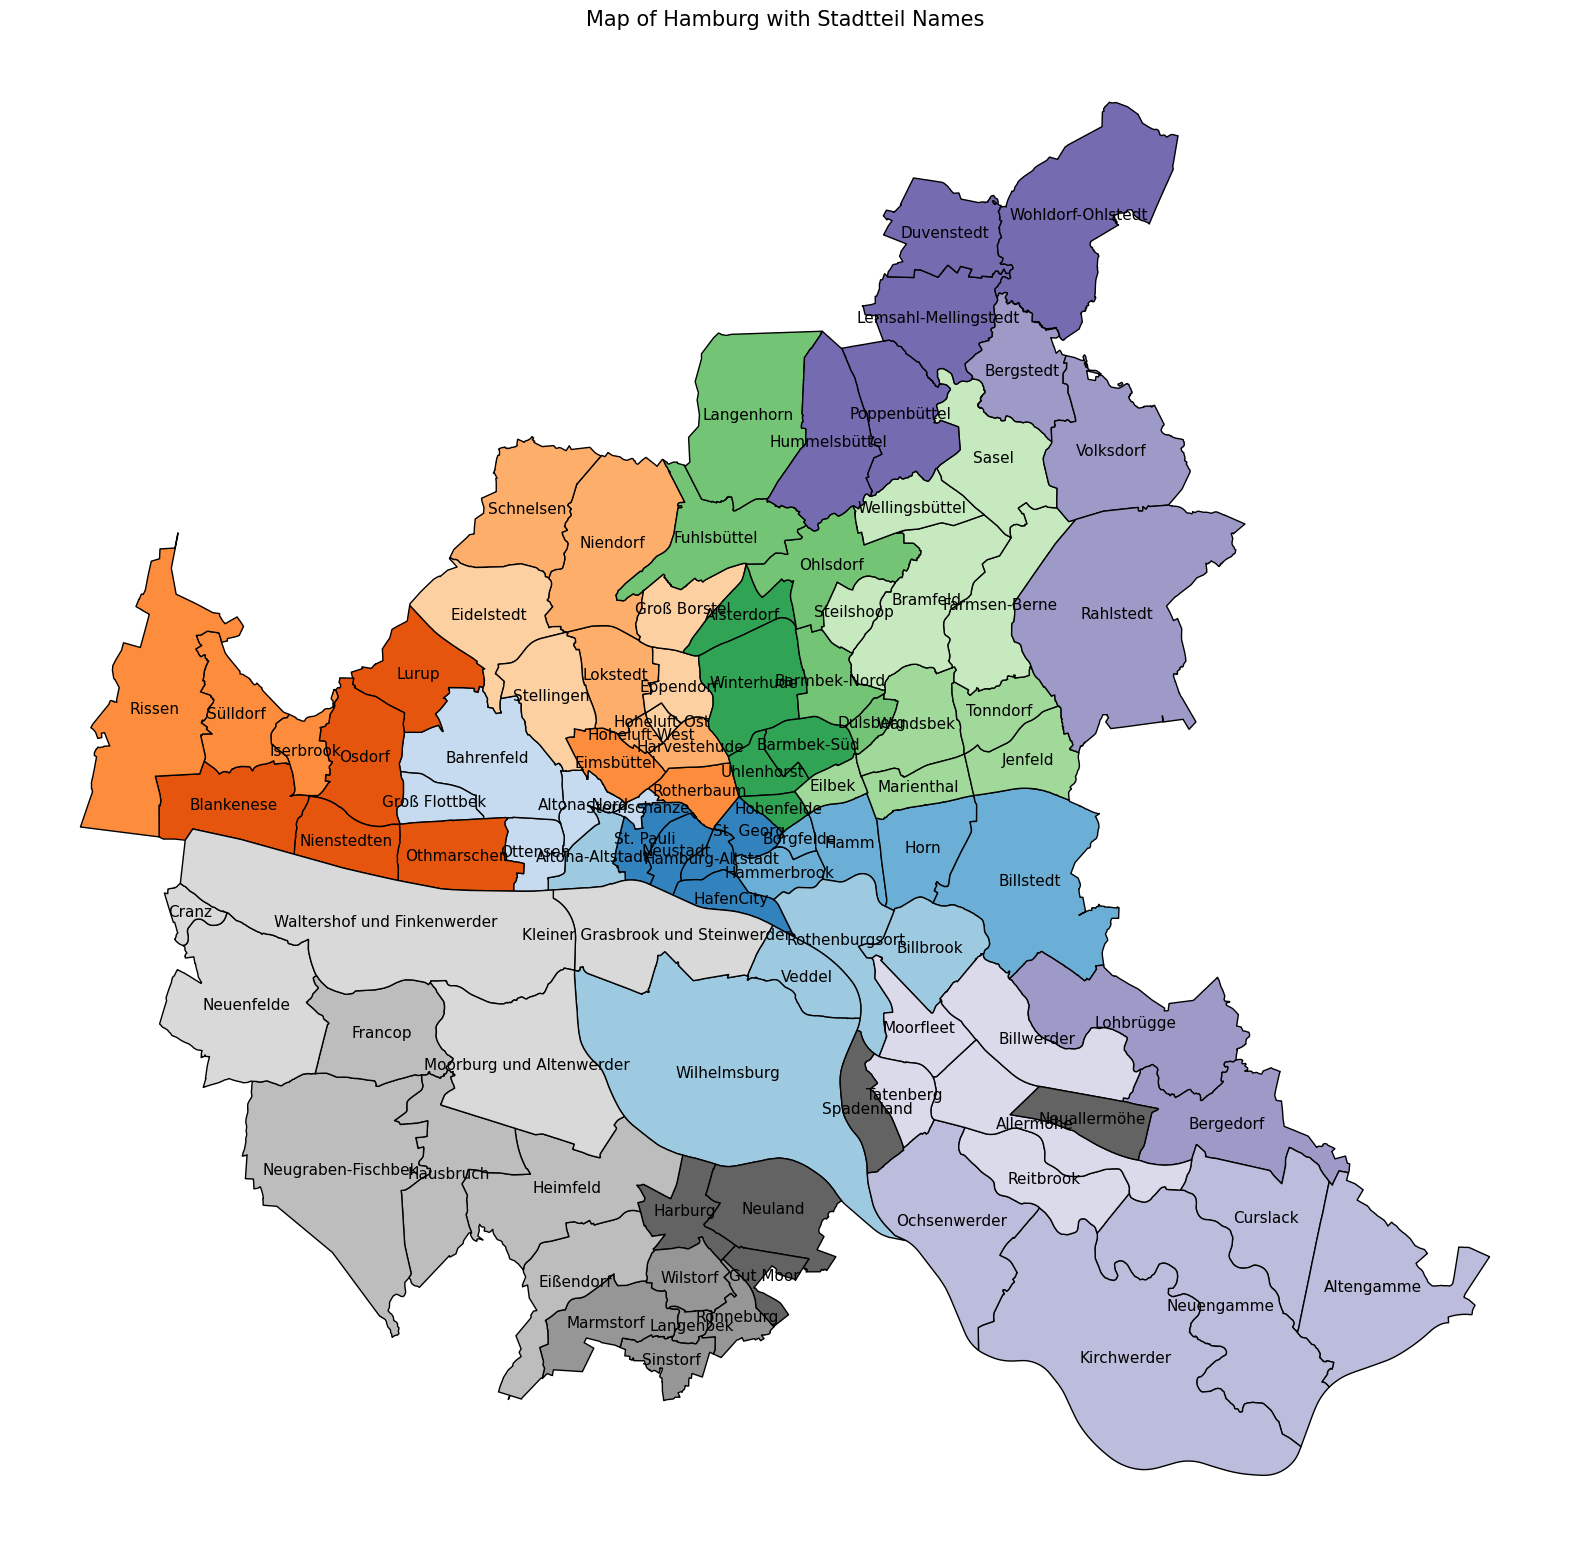

In [263]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the Stadtteile map
hamburg_shp.plot(ax=ax, cmap="tab20c", edgecolor='black')

# Initialize a list to store text objects
texts = []

# Add labels for each Stadtteil
for idx, row in hamburg_shp.iterrows():
    # Note: The label is placed at the centroid of each polygon
    texts.append(ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, 
                         s=row["Stadtteilname"], ha='center', va='center', fontsize=11))

# Automatically adjust text positions to avoid overlap
# adjust_text(texts, arrowprops=dict(arrowstyle='simple', color='black', linewidth=0.3))

# Add title and axis labels
ax.set_title('Map of Hamburg with Stadtteil Names', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Turn off axis display
ax.set_axis_off()

# Show the plot
plt.show()


## (b) Hamburg Stadtteil Dataset Distribution: Training and Testing
### *This section reflects the results for each randomly assigned training and validation set. For different conditions of each method, the variable names need to be changed accordingly.

In [264]:
# 1. Initialize dataset categories
hamburg_shp['dataset_category'] = 'testing'  # Default to the testing set

# 2. Update the category for the training set
# X_train.index contains all the Stadtteil names in the training set
training_stadtteile = X_train.index
for stadtteil in training_stadtteile:
    if stadtteil in hamburg_shp.index:
        hamburg_shp.loc[stadtteil, 'dataset_category'] = 'training'

# 3. Define conditions and colors for visualization (optional)
conditions = [
    hamburg_shp['dataset_category'] == 'training',
    hamburg_shp['dataset_category'] == 'testing'
]
colors = ['lightgrey', 'darkgrey']  # Training set in light grey, testing set in dark grey

# Apply colors; if unclassified categories need a default color, you can set it with the default parameter
hamburg_shp['color'] = np.select(conditions, colors, default='grey')


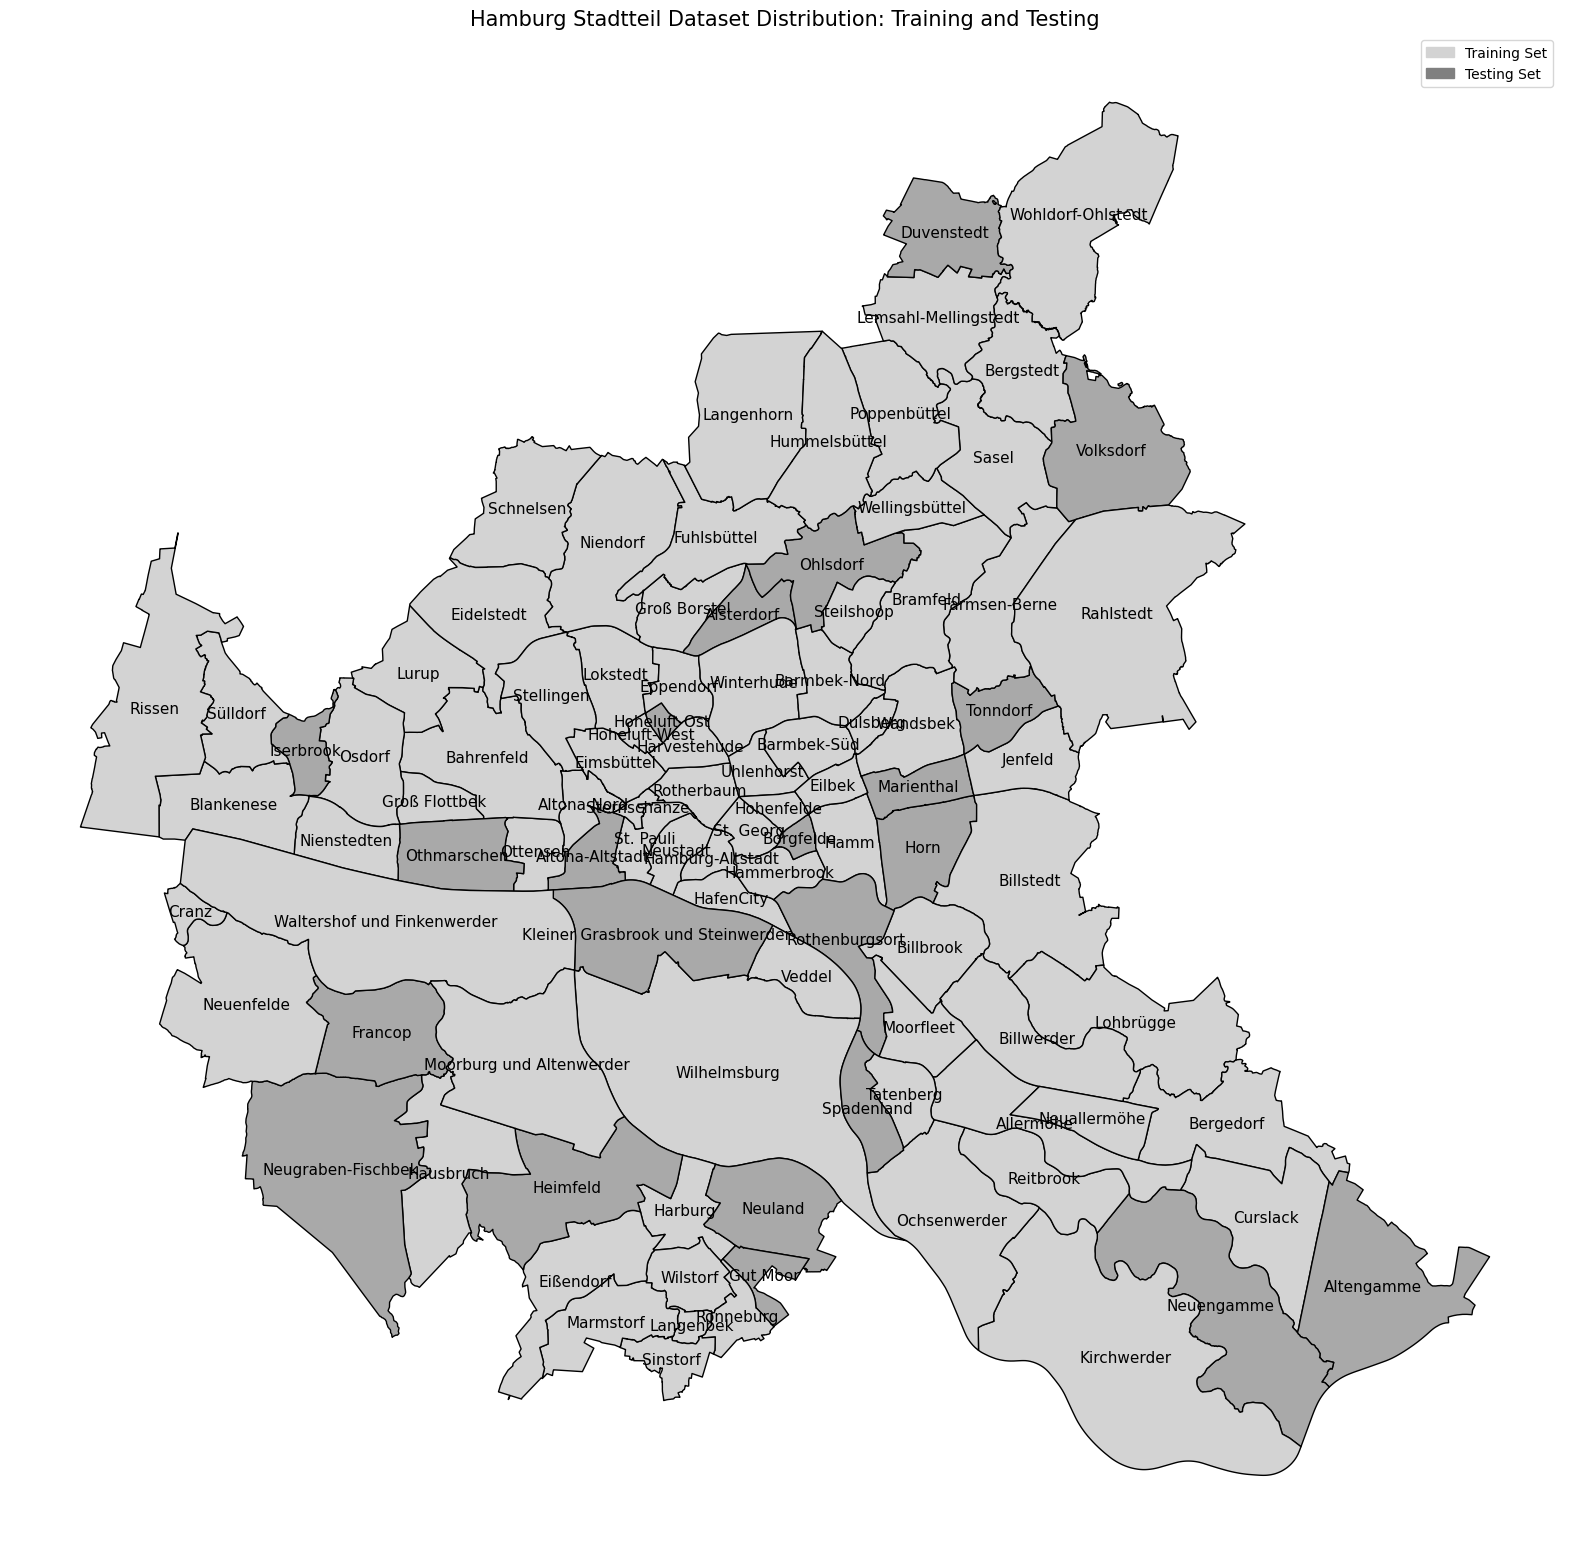

In [265]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text  # Ensure the adjustText library is installed

fig, ax = plt.subplots(figsize=(20, 20))

# Use the GeoDataFrame's plot method, setting the color parameter using the color column
hamburg_shp.plot(ax=ax, color=hamburg_shp['color'], edgecolor='black')

# Reinitialize the list of text objects and add labels for each Stadtteil
texts = []
for idx, row in hamburg_shp.iterrows():
    # Ensure the geometry centroid exists to prevent errors
    if not row.geometry.is_empty:
        texts.append(ax.text(row.geometry.centroid.x, row.geometry.centroid.y,
                             s=idx,  # idx is the name of the Stadtteil
                             ha='center', va='center', fontsize=11))

# Update the legend
light_grey_patch = mpatches.Patch(color='lightgrey', label='Training Set')
grey_patch = mpatches.Patch(color='grey', label='Testing Set')  # Default color
plt.legend(handles=[light_grey_patch, grey_patch], loc='upper right')

ax.set_title('Hamburg Stadtteil Dataset Distribution: Training and Testing', fontsize=15)
ax.set_axis_off()

plt.show()
